# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -2 Traffic Sign Dataset - Classification

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2231372260446083024
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14323224051762408758
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [6]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [8]:
data = pd.DataFrame()
main_path = 'DATA/'
name=[]


pa = 'DATA'

entry = []
for filename in os.listdir(pa):
    entry.append(filename)


for i in entry:
    name.append(os.listdir('DATA/'+i))

len(name)

pn=[]
for i in range(len(name)):
    for j in name[i]:
        pn.append(j)
        

data['images_name']= pn
classes = []
paths = []
for image in data['images_name']:
    class_ = image.split('_')[0]
    
    if class_ == 'Ala':
        class_='Ala_Idris'
        
    classes.append(int(class_))
    paths.append(main_path+str(int(class_))+'/'+image)

data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

4170


,images_name,classes,path
0,000_0001.png,0,DATA/0/000_0001.png
1,000_0002.png,0,DATA/0/000_0002.png
2,000_0003.png,0,DATA/0/000_0003.png
3,000_0004.png,0,DATA/0/000_0004.png
4,000_0005.png,0,DATA/0/000_0005.png


In [9]:
li = data.classes.unique()

li=list(li)


In [10]:
li

[0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 6,
 7,
 8,
 9]

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [11]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=128



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']
    

    image=cv2.imread(p)
#     print(image)
    image=Image.fromarray(image,'RGB')
 
    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))

    
    pic.append(image)
#     label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [12]:
dataset = im

print(type(im))
# print(type(label))

dataset=np.array(dataset)
# label=np.array(label)

print(type(dataset))
# print(type(label))

<class 'list'>
<class 'numpy.ndarray'>


<ipython-input-13-ad9a3bf570cb>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-13-ad9a3bf570cb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


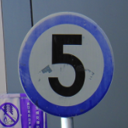

In [13]:
df['im_array']= im
# df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [14]:
df.shape

(4170, 5)

In [15]:
label=df.classes
type(label)

pandas.core.series.Series

In [16]:
len(li)

58

## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = 58

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(3336, 128, 128, 3)
(3336,)


## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [21]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [21]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 15 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [22]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

    
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)



    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 62)      1736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 62)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 62)       248       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 62)        34658     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 62)       0         
 2D)                                                             
                                                        

Epoch 15/40
105/105 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.6829
Epoch 15: val_accuracy improved from 0.67626 to 0.68225, saving model to model_62_relu_max.hdf5
105/105 [==============================] - 40s 382ms/step - loss: 0.9781 - accuracy: 0.6829 - val_loss: 0.9842 - val_accuracy: 0.6823
Epoch 16/40
105/105 [==============================] - ETA: 0s - loss: 0.8991 - accuracy: 0.7251
Epoch 16: val_accuracy improved from 0.68225 to 0.75899, saving model to model_62_relu_max.hdf5
105/105 [==============================] - 32s 306ms/step - loss: 0.8991 - accuracy: 0.7251 - val_loss: 0.7236 - val_accuracy: 0.7590
Epoch 17/40
105/105 [==============================] - ETA: 0s - loss: 0.8876 - accuracy: 0.7209
Epoch 17: val_accuracy did not improve from 0.75899
105/105 [==============================] - 32s 305ms/step - loss: 0.8876 - accuracy: 0.7209 - val_loss: 1.0482 - val_accuracy: 0.6571
Epoch 18/40
105/105 [==============================] - ETA: 0s 

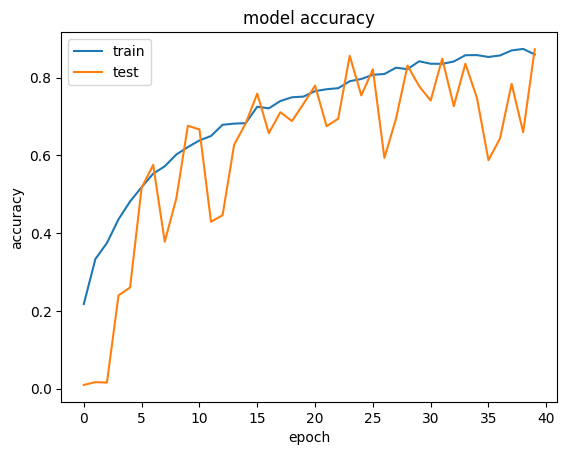

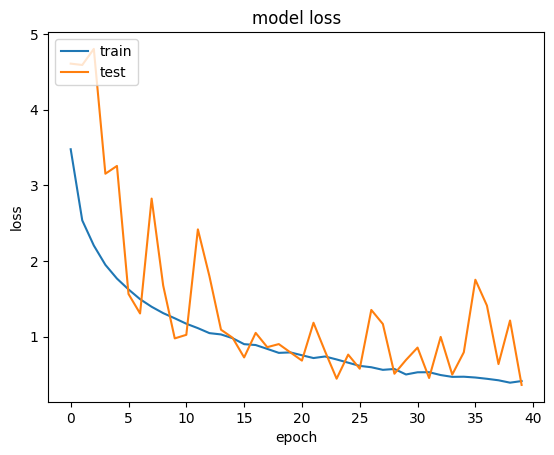

<ipython-input-34-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [35]:
# CNN_model(62,'relu','max',40)

# Find the best Relu Variants

In [23]:
act=['relu','elu','gelu','selu','LeakyReLU']

act2=['selu','LeakyReLU']

#### Best activation with max pooling

relu
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                   

Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.9684 - accuracy: 0.6993
Epoch 15: val_accuracy did not improve from 0.77458
105/105 [==============================] - 25s 238ms/step - loss: 0.9684 - accuracy: 0.6993 - val_loss: 0.8972 - val_accuracy: 0.7014
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.8885 - accuracy: 0.7293
Epoch 16: val_accuracy did not improve from 0.77458
105/105 [==============================] - 25s 240ms/step - loss: 0.8885 - accuracy: 0.7293 - val_loss: 1.0414 - val_accuracy: 0.6655
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.9066 - accuracy: 0.7167
Epoch 17: val_accuracy did not improve from 0.77458
105/105 [==============================] - 25s 239ms/step - loss: 0.9066 - accuracy: 0.7167 - val_loss: 2.1145 - val_accuracy: 0.4436
Epoch 18/25
105/105 [==============================] - ETA: 0s - loss: 0.8255 - accuracy: 0.7449
Epoch 18: val_accuracy did not improve from 0.77458
10

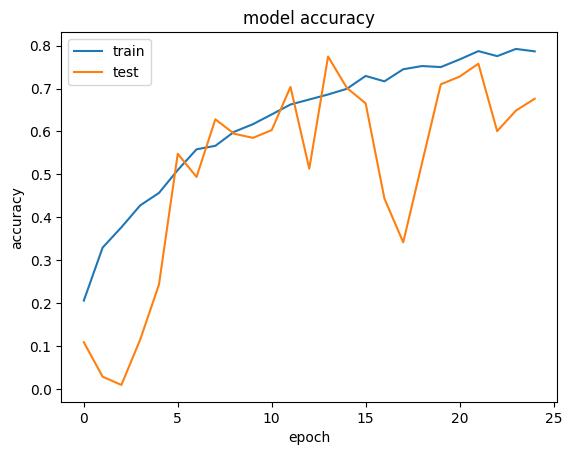

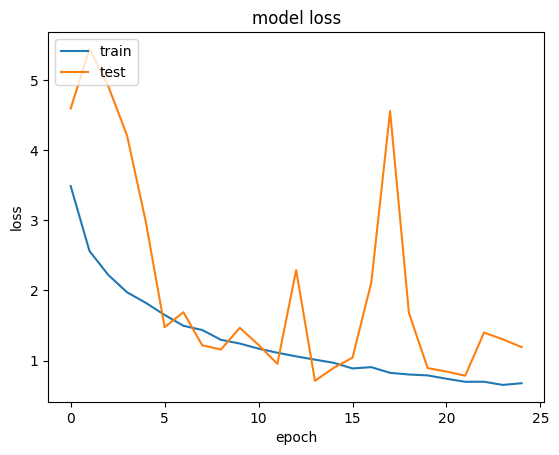

<ipython-input-24-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                  

Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.9137 - accuracy: 0.7209
Epoch 15: val_accuracy did not improve from 0.75060
105/105 [==============================] - 30s 281ms/step - loss: 0.9137 - accuracy: 0.7209 - val_loss: 0.7839 - val_accuracy: 0.7374
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.8367 - accuracy: 0.7395
Epoch 16: val_accuracy improved from 0.75060 to 0.78777, saving model to model_64_elu_max.hdf5
105/105 [==============================] - 30s 288ms/step - loss: 0.8367 - accuracy: 0.7395 - val_loss: 0.6643 - val_accuracy: 0.7878
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.7467
Epoch 17: val_accuracy did not improve from 0.78777
105/105 [==============================] - 33s 309ms/step - loss: 0.8239 - accuracy: 0.7467 - val_loss: 0.7116 - val_accuracy: 0.7578
Epoch 18/25
105/105 [==============================] - ETA: 0s - loss: 0.7847 - accuracy: 0.7503
Epoch 18: v

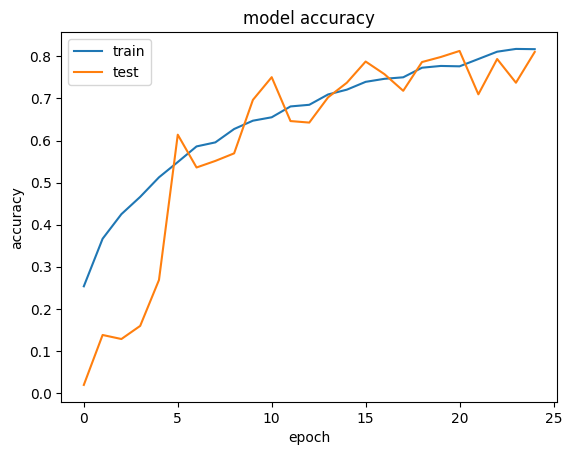

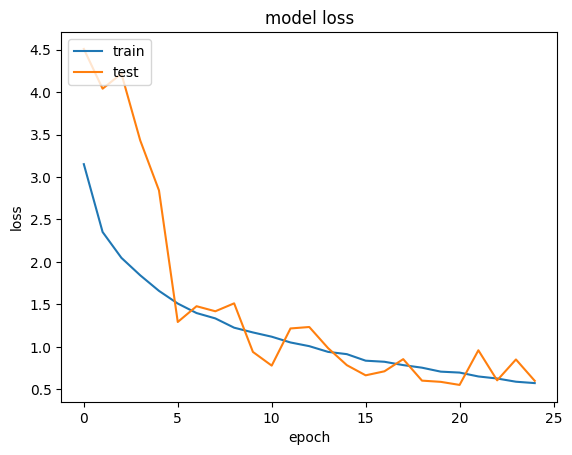

<ipython-input-24-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                 

105/105 [==============================] - 49s 462ms/step - loss: 0.9594 - accuracy: 0.7044 - val_loss: 0.8707 - val_accuracy: 0.7134
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.8864 - accuracy: 0.7269
Epoch 15: val_accuracy improved from 0.71343 to 0.72542, saving model to model_64_gelu_max.hdf5
105/105 [==============================] - 48s 450ms/step - loss: 0.8864 - accuracy: 0.7269 - val_loss: 0.8826 - val_accuracy: 0.7254
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.7308
Epoch 16: val_accuracy did not improve from 0.72542
105/105 [==============================] - 46s 436ms/step - loss: 0.8583 - accuracy: 0.7308 - val_loss: 0.9161 - val_accuracy: 0.6990
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.8599 - accuracy: 0.7332
Epoch 17: val_accuracy did not improve from 0.72542
105/105 [==============================] - 44s 421ms/step - loss: 0.8599 - accuracy: 0.7332 - val_loss: 1.4

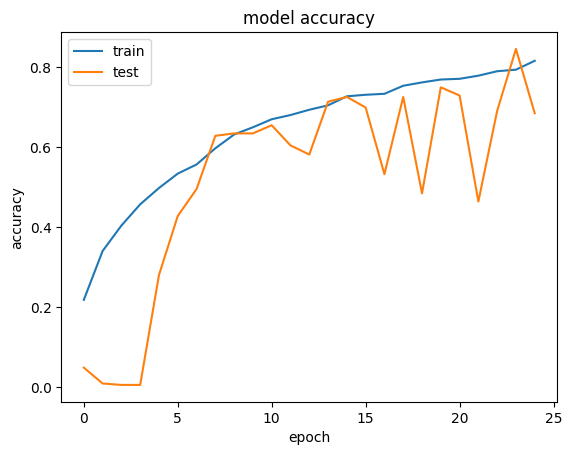

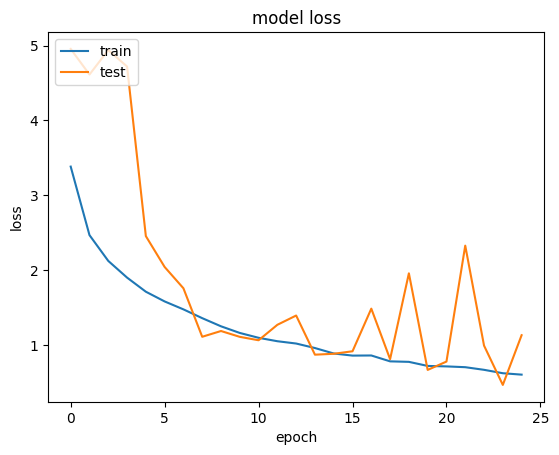

<ipython-input-24-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


selu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

In [ ]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)
    

selu
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                   

105/105 [==============================] - 33s 309ms/step - loss: 0.9672 - accuracy: 0.6906 - val_loss: 1.2663 - val_accuracy: 0.6019
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.9319 - accuracy: 0.7110
Epoch 15: val_accuracy did not improve from 0.67506
105/105 [==============================] - 30s 285ms/step - loss: 0.9319 - accuracy: 0.7110 - val_loss: 1.2142 - val_accuracy: 0.6367
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.8933 - accuracy: 0.7224
Epoch 16: val_accuracy did not improve from 0.67506
105/105 [==============================] - 33s 308ms/step - loss: 0.8933 - accuracy: 0.7224 - val_loss: 1.6783 - val_accuracy: 0.4652
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.8395 - accuracy: 0.7380
Epoch 17: val_accuracy did not improve from 0.67506
105/105 [==============================] - 30s 283ms/step - loss: 0.8395 - accuracy: 0.7380 - val_loss: 1.1298 - val_accuracy: 0.6391
Epoch 18/25
105/1

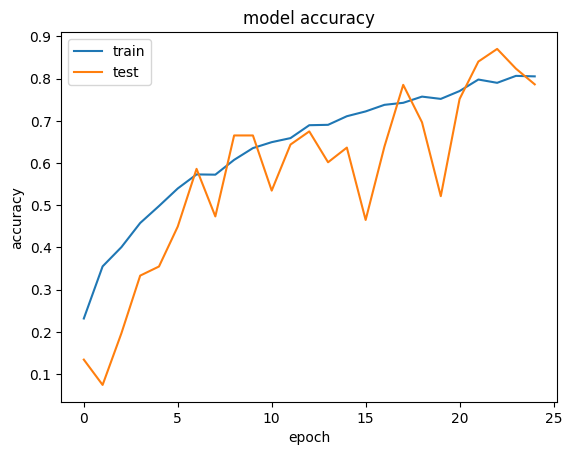

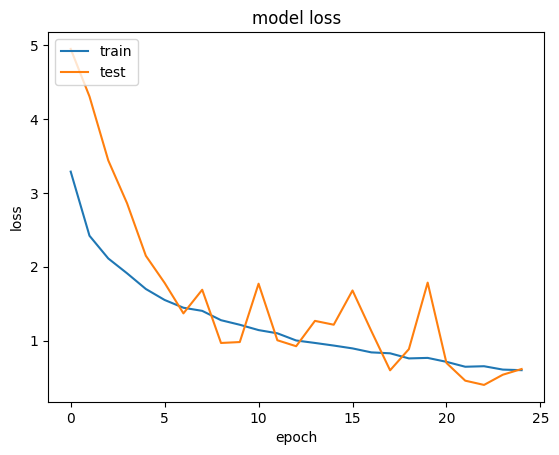

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


LeakyReLU
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                            

105/105 [==============================] - ETA: 0s - loss: 1.0250 - accuracy: 0.6817
Epoch 14: val_accuracy did not improve from 0.71583
105/105 [==============================] - 35s 332ms/step - loss: 1.0250 - accuracy: 0.6817 - val_loss: 0.9386 - val_accuracy: 0.7002
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.6900
Epoch 15: val_accuracy improved from 0.71583 to 0.74341, saving model to model_64_LeakyReLU_max.hdf5
105/105 [==============================] - 36s 339ms/step - loss: 0.9739 - accuracy: 0.6900 - val_loss: 0.7387 - val_accuracy: 0.7434
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.9509 - accuracy: 0.6981
Epoch 16: val_accuracy did not improve from 0.74341
105/105 [==============================] - 31s 293ms/step - loss: 0.9509 - accuracy: 0.6981 - val_loss: 0.8610 - val_accuracy: 0.7266
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.9397 - accuracy: 0.7035
Epoch 17: val_acc

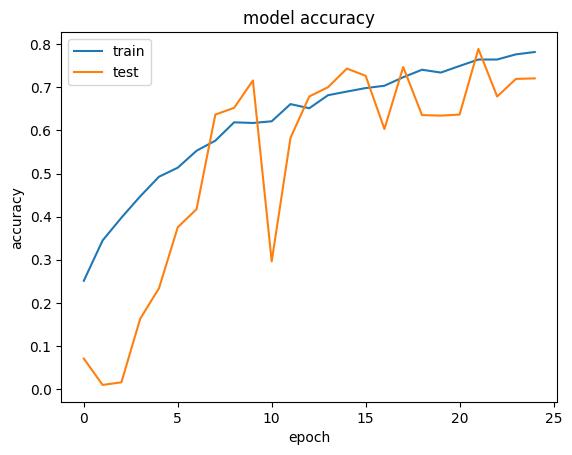

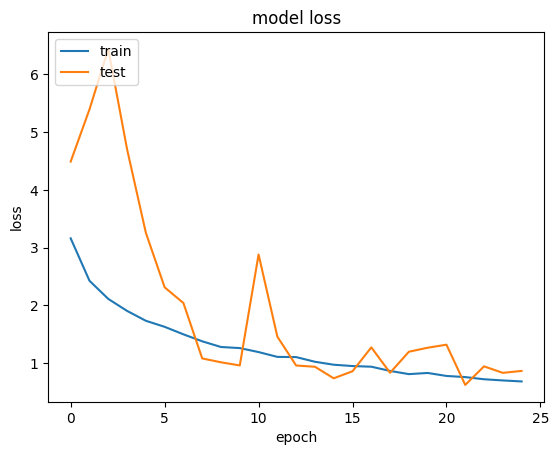

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [24]:
for i in act2:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)

In [29]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,selu,64,max,25,0.870504
1,LeakyReLU,64,max,25,0.788969
2,relu,64,<built-in function max>,25,0.774580
3,elu,64,<built-in function max>,25,0.812949
4,gelu,64,<built-in function max>,25,0.845323


### Finding best activation function with average pooling

relu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

105/105 [==============================] - ETA: 0s - loss: 1.0416 - accuracy: 0.6820
Epoch 14: val_accuracy improved from 0.67266 to 0.67506, saving model to model_64_relu_average.hdf5
105/105 [==============================] - 29s 277ms/step - loss: 1.0416 - accuracy: 0.6820 - val_loss: 0.9330 - val_accuracy: 0.6751
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.6874
Epoch 15: val_accuracy did not improve from 0.67506
105/105 [==============================] - 24s 225ms/step - loss: 0.9957 - accuracy: 0.6874 - val_loss: 1.3476 - val_accuracy: 0.5540
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.9200 - accuracy: 0.7143
Epoch 16: val_accuracy did not improve from 0.67506
105/105 [==============================] - 27s 259ms/step - loss: 0.9200 - accuracy: 0.7143 - val_loss: 1.2732 - val_accuracy: 0.6331
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.8963 - accuracy: 0.7113
Epoch 17: val_accu

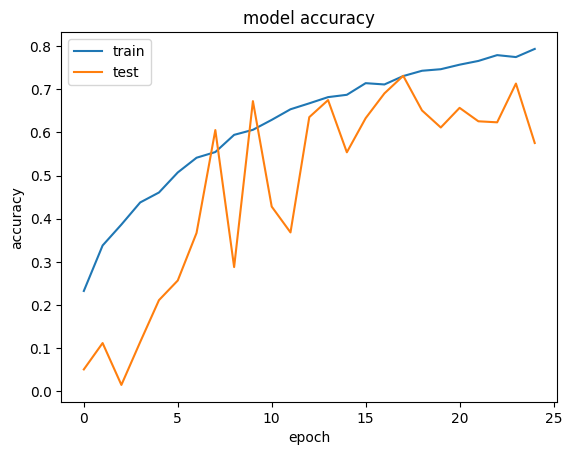

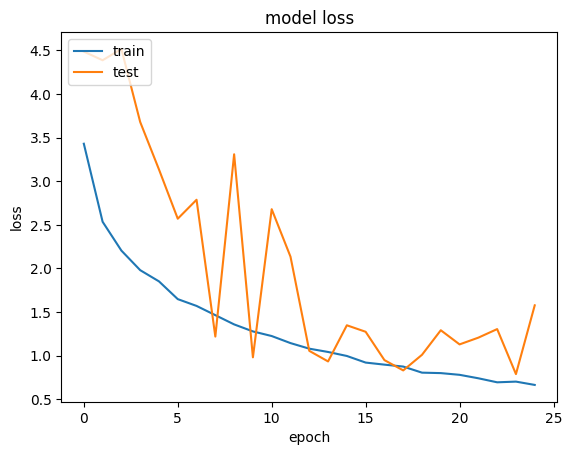

elu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                  

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


Epoch 1/25
105/105 [==============================] - ETA: 0s - loss: 3.2094 - accuracy: 0.2356
Epoch 1: val_accuracy improved from -inf to 0.08273, saving model to model_64_elu_average.hdf5
105/105 [==============================] - 31s 259ms/step - loss: 3.2094 - accuracy: 0.2356 - val_loss: 5.5562 - val_accuracy: 0.0827
Epoch 2/25
105/105 [==============================] - ETA: 0s - loss: 2.4938 - accuracy: 0.3345
Epoch 2: val_accuracy improved from 0.08273 to 0.11511, saving model to model_64_elu_average.hdf5
105/105 [==============================] - 29s 273ms/step - loss: 2.4938 - accuracy: 0.3345 - val_loss: 4.4942 - val_accuracy: 0.1151
Epoch 3/25
105/105 [==============================] - ETA: 0s - loss: 2.2660 - accuracy: 0.3531
Epoch 3: val_accuracy improved from 0.11511 to 0.15707, saving model to model_64_elu_average.hdf5
105/105 [==============================] - 26s 250ms/step - loss: 2.2660 - accuracy: 0.3531 - val_loss: 4.0904 - val_accuracy: 0.1571
Epoch 4/25
105/105 

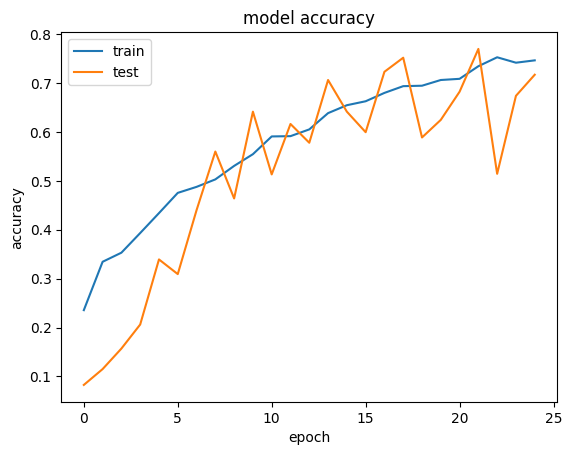

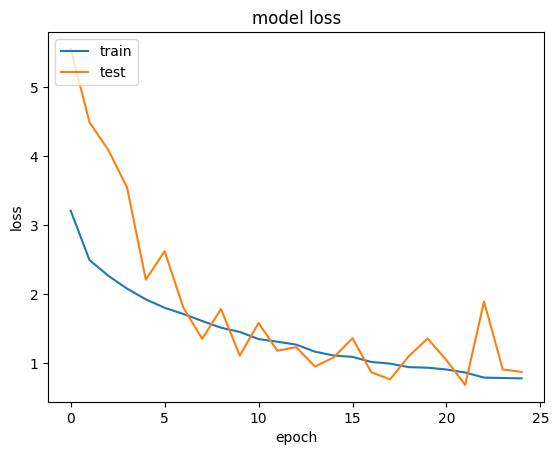

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 1.0175 - accuracy: 0.6906
Epoch 15: val_accuracy improved from 0.60671 to 0.73381, saving model to model_64_gelu_average.hdf5
105/105 [==============================] - 38s 364ms/step - loss: 1.0175 - accuracy: 0.6906 - val_loss: 0.7867 - val_accuracy: 0.7338
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.9895 - accuracy: 0.6894
Epoch 16: val_accuracy did not improve from 0.73381
105/105 [==============================] - 43s 406ms/step - loss: 0.9895 - accuracy: 0.6894 - val_loss: 0.9697 - val_accuracy: 0.6739
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.9117 - accuracy: 0.7188
Epoch 17: val_accuracy did not improve from 0.73381
105/105 [==============================] - 39s 367ms/step - loss: 0.9117 - accuracy: 0.7188 - val_loss: 1.5054 - val_accuracy: 0.5228
Epoch 18/25
105/105 [==============================] - ETA: 0s - loss: 0.9189 - accuracy: 0.7107
Epoch 

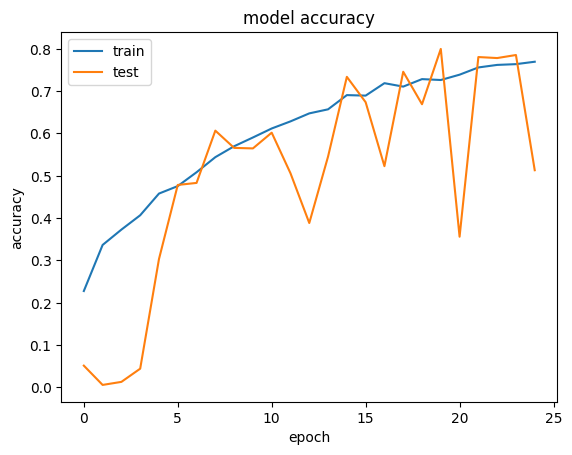

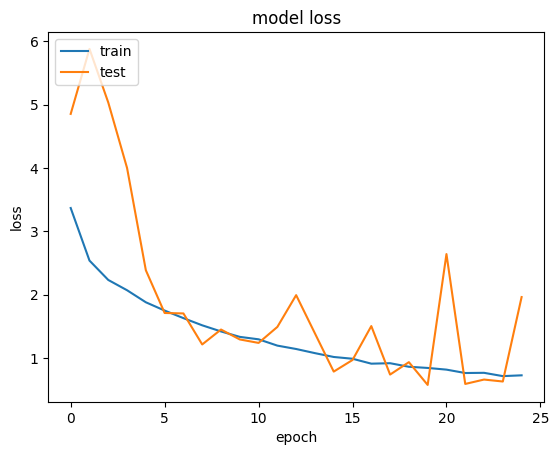

selu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_13 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                                 

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 gePooling2D)                                                    
                                                                 
 batch_normalization_37 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 average_pooling2d_15 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_38 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_5

105/105 [==============================] - ETA: 0s - loss: 0.9865 - accuracy: 0.6862
Epoch 19: val_accuracy did not improve from 0.70863
105/105 [==============================] - 25s 237ms/step - loss: 0.9865 - accuracy: 0.6862 - val_loss: 1.2612 - val_accuracy: 0.5851
Epoch 20/25
105/105 [==============================] - ETA: 0s - loss: 0.9673 - accuracy: 0.6933
Epoch 20: val_accuracy did not improve from 0.70863
105/105 [==============================] - 25s 237ms/step - loss: 0.9673 - accuracy: 0.6933 - val_loss: 1.1696 - val_accuracy: 0.6163
Epoch 21/25
105/105 [==============================] - ETA: 0s - loss: 0.9296 - accuracy: 0.7071
Epoch 21: val_accuracy improved from 0.70863 to 0.74940, saving model to model_64_selu_average.hdf5
105/105 [==============================] - 26s 246ms/step - loss: 0.9296 - accuracy: 0.7071 - val_loss: 0.6788 - val_accuracy: 0.7494
Epoch 22/25
105/105 [==============================] - ETA: 0s - loss: 0.8950 - accuracy: 0.7110
Epoch 22: val_accu

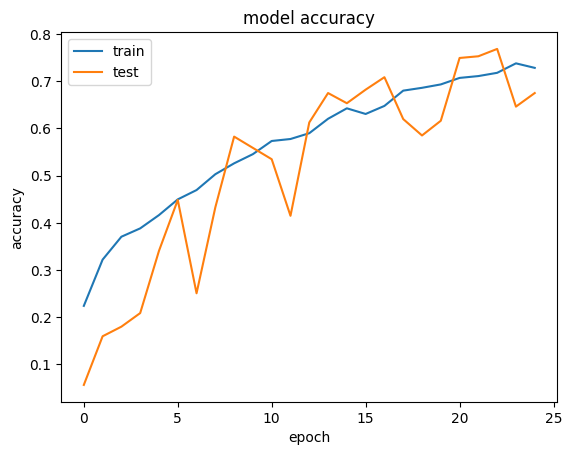

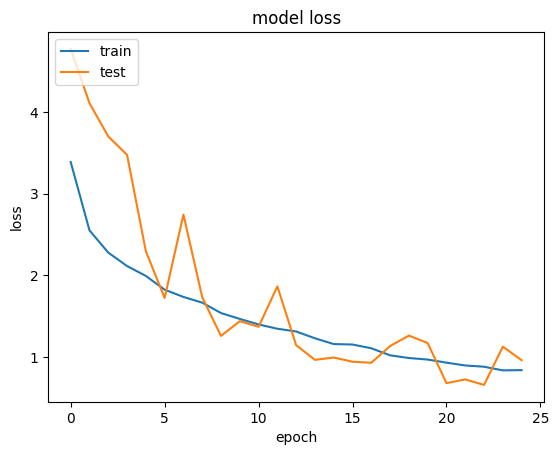

LeakyReLU
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_17 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                            

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 average_pooling2d_19 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 dropout_12 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_45 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1180160   
                                                                 
 batch_normalization_46 (Bat  (None, 512)              2048      
 chNormalization)                                                
          

Epoch 21/25
105/105 [==============================] - ETA: 0s - loss: 1.0431 - accuracy: 0.6658
Epoch 21: val_accuracy improved from 0.68945 to 0.74341, saving model to model_64_LeakyReLU_average.hdf5
105/105 [==============================] - 29s 277ms/step - loss: 1.0431 - accuracy: 0.6658 - val_loss: 0.7546 - val_accuracy: 0.7434
Epoch 22/25
105/105 [==============================] - ETA: 0s - loss: 1.0084 - accuracy: 0.6709
Epoch 22: val_accuracy did not improve from 0.74341
105/105 [==============================] - 27s 251ms/step - loss: 1.0084 - accuracy: 0.6709 - val_loss: 2.5278 - val_accuracy: 0.3849
Epoch 23/25
105/105 [==============================] - ETA: 0s - loss: 0.9664 - accuracy: 0.6960
Epoch 23: val_accuracy did not improve from 0.74341
105/105 [==============================] - 28s 266ms/step - loss: 0.9664 - accuracy: 0.6960 - val_loss: 1.4175 - val_accuracy: 0.5911
Epoch 24/25
105/105 [==============================] - ETA: 0s - loss: 0.9538 - accuracy: 0.6921
E

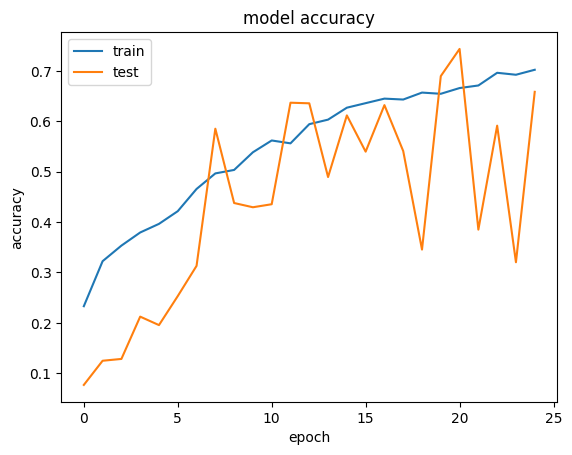

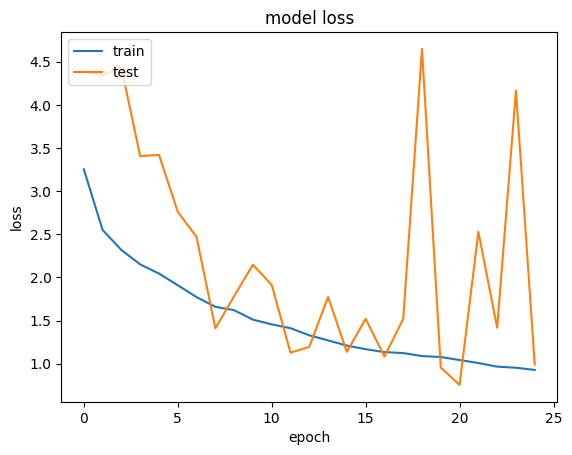

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [30]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

In [31]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,selu,64,max,25,0.870504
1,LeakyReLU,64,max,25,0.788969
2,relu,64,<built-in function max>,25,0.774580
3,elu,64,<built-in function max>,25,0.812949
4,gelu,64,<built-in function max>,25,0.845323
5,relu,64,average,25,0.731415
6,elu,64,average,25,0.769784
7,gelu,64,average,25,0.799760
8,selu,64,average,25,0.768585
9,LeakyReLU,64,average,25,0.743405


In [37]:
gk = df_r.groupby('activation_function').mean()
gk.head()

<ipython-input-37-52a5c7ce8e0b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('activation_function').mean()


,test_accuracy
activation_function,
LeakyReLU,0.766187
elu,0.791367
gelu,0.822542
relu,0.752997
selu,0.819544


## Conclusion regarding the performance of Activation function

seeing all the results selu and gelu seems to give the best results for max and average type poolings, however on average gelu gives best result hence we will chose gelu for futrther analysis

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results compared overall

## The best activation function is 'GELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                   

105/105 [==============================] - ETA: 0s - loss: 1.3006 - accuracy: 0.5896
Epoch 14: val_accuracy did not improve from 0.72302
105/105 [==============================] - 13s 119ms/step - loss: 1.3006 - accuracy: 0.5896 - val_loss: 1.1154 - val_accuracy: 0.6391
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 1.2171 - accuracy: 0.6175
Epoch 15: val_accuracy did not improve from 0.72302
105/105 [==============================] - 13s 121ms/step - loss: 1.2171 - accuracy: 0.6175 - val_loss: 1.3839 - val_accuracy: 0.5755
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 1.2091 - accuracy: 0.6094
Epoch 16: val_accuracy did not improve from 0.72302
105/105 [==============================] - 14s 133ms/step - loss: 1.2091 - accuracy: 0.6094 - val_loss: 0.9398 - val_accuracy: 0.7218
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 1.1912 - accuracy: 0.6121
Epoch 17: val_accuracy did not improve from 0.72302
105/105 [=====

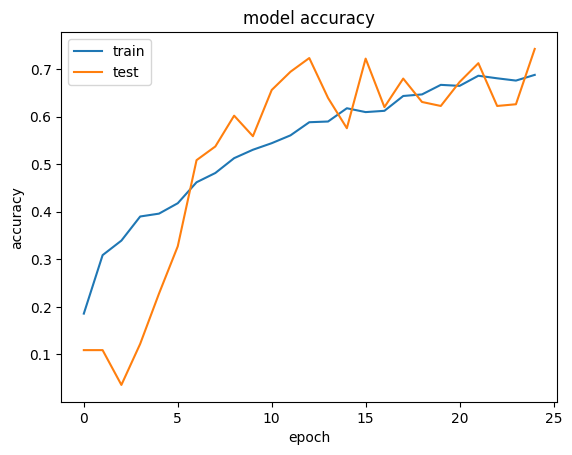

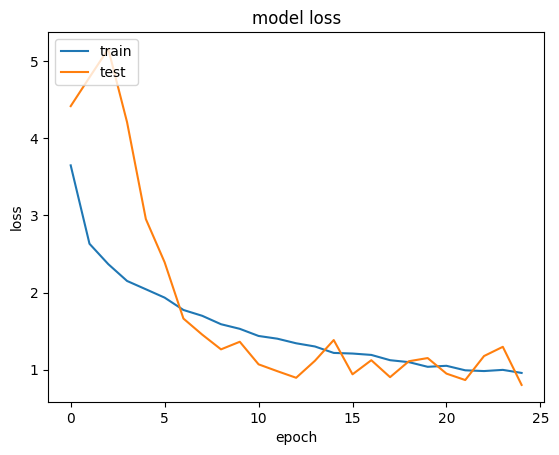

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_56 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                   

105/105 [==============================] - ETA: 0s - loss: 1.0668 - accuracy: 0.6661
Epoch 14: val_accuracy did not improve from 0.68945
105/105 [==============================] - 22s 209ms/step - loss: 1.0668 - accuracy: 0.6661 - val_loss: 1.4226 - val_accuracy: 0.5564
Epoch 15/25
105/105 [==============================] - ETA: 0s - loss: 1.0293 - accuracy: 0.6790
Epoch 15: val_accuracy did not improve from 0.68945
105/105 [==============================] - 22s 205ms/step - loss: 1.0293 - accuracy: 0.6790 - val_loss: 1.1572 - val_accuracy: 0.6319
Epoch 16/25
105/105 [==============================] - ETA: 0s - loss: 0.9924 - accuracy: 0.6862
Epoch 16: val_accuracy did not improve from 0.68945
105/105 [==============================] - 23s 220ms/step - loss: 0.9924 - accuracy: 0.6862 - val_loss: 0.9682 - val_accuracy: 0.6631
Epoch 17/25
105/105 [==============================] - ETA: 0s - loss: 0.9378 - accuracy: 0.7086
Epoch 17: val_accuracy did not improve from 0.68945
105/105 [=====

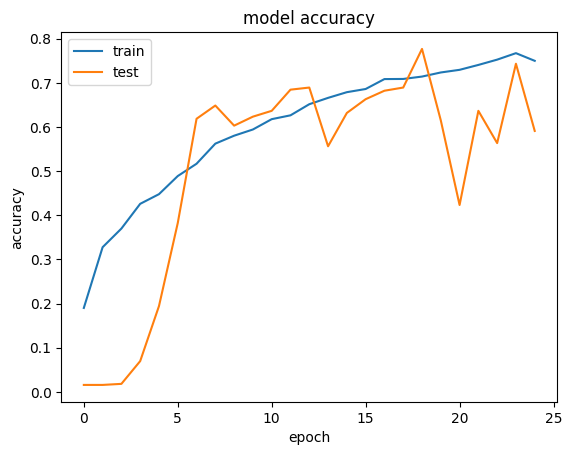

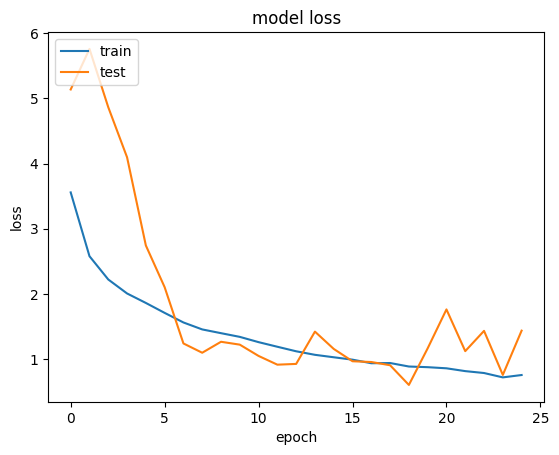

64
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_63 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                   

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_69 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 58)                3770      
                                                                 
Total params: 1,448,634
Trainable params: 1,446,458
Non-trainable params: 2,176
_________________________________________________________________
Epoch 1/25
105/105 [==============================] - ETA: 0s - loss: 3.4092 - accuracy: 0.2239
Epoch 1: val_accuracy improved f

Epoch 25/25
105/105 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.8204
Epoch 25: val_accuracy did not improve from 0.82134
105/105 [==============================] - 49s 463ms/step - loss: 0.5782 - accuracy: 0.8204 - val_loss: 0.6400 - val_accuracy: 0.7806
Training time: 0:19:01.527705
Test score: 0.5476099848747253
Test accuracy: 0.821342945098877
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


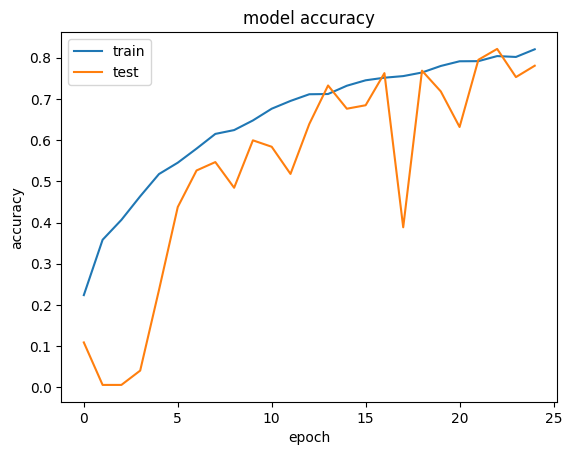

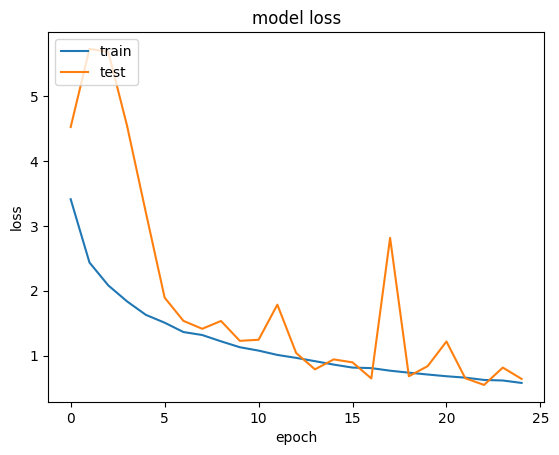

<ipython-input-22-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


128
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_70 (Bat  (None, 63, 63, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                 

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_10/conv2d_40/Gelu/Erf' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-38-4febf04eec0f>", line 6, in <module>
      CNN_model(i,'gelu','max',25)
    File "<ipython-input-22-653d1271906e>", line 83, in CNN_model
      history = model.fit(datagen_preprocessing.flow(x_train,y_train,
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/usr/local/lib/python3.8/dist-packages/keras/activations.py", line 359, in gelu
      return tf.nn.gelu(x, approximate)
Node: 'sequential_10/conv2d_40/Gelu/Erf'
failed to allocate memory
	 [[{{node sequential_10/conv2d_40/Gelu/Erf}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_239216]

In [38]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'gelu','max',25)

for 128 filters it could not be executed due to system memory limiation

In [39]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,selu,64,max,25,0.870504
1,LeakyReLU,64,max,25,0.788969
2,relu,64,<built-in function max>,25,0.774580
3,elu,64,<built-in function max>,25,0.812949
4,gelu,64,<built-in function max>,25,0.845323
5,relu,64,average,25,0.731415
6,elu,64,average,25,0.769784
7,gelu,64,average,25,0.799760
8,selu,64,average,25,0.768585
9,LeakyReLU,64,average,25,0.743405


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters

## the best model is with 'gelu' activation function 64 filters and maxpooling can give results from accuracy of 0.84 to 0.82

Saving the results as csv file

In [43]:
df_results1=df_r.copy()
df_results1['dataset']='Traffic Sign Dataset - Classification'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,selu,64,max,25,0.870504,Traffic Sign Dataset - Classification
1,LeakyReLU,64,max,25,0.788969,Traffic Sign Dataset - Classification
2,relu,64,<built-in function max>,25,0.774580,Traffic Sign Dataset - Classification
3,elu,64,<built-in function max>,25,0.812949,Traffic Sign Dataset - Classification
4,gelu,64,<built-in function max>,25,0.845323,Traffic Sign Dataset - Classification


In [44]:
df_results1.to_csv('df_results1_d2.csv',index=False)

In [45]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,selu,64,max,25,0.870504,Traffic Sign Dataset - Classification
4,gelu,64,<built-in function max>,25,0.845323,Traffic Sign Dataset - Classification
12,gelu,64,max,25,0.821343,Traffic Sign Dataset - Classification
3,elu,64,<built-in function max>,25,0.812949,Traffic Sign Dataset - Classification
7,gelu,64,average,25,0.799760,Traffic Sign Dataset - Classification
1,LeakyReLU,64,max,25,0.788969,Traffic Sign Dataset - Classification
11,gelu,32,max,25,0.776978,Traffic Sign Dataset - Classification
2,relu,64,<built-in function max>,25,0.774580,Traffic Sign Dataset - Classification
6,elu,64,average,25,0.769784,Traffic Sign Dataset - Classification
8,selu,64,average,25,0.768585,Traffic Sign Dataset - Classification


Imagenet models are run on googlecolab models

# Using imagenet winner model

## Resnet

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization

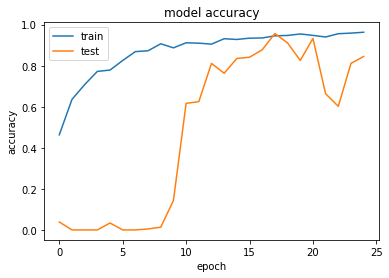

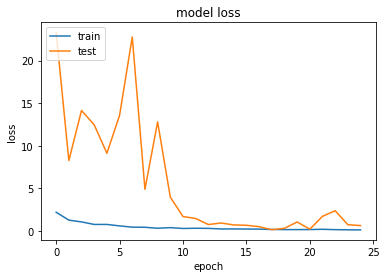

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=58)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=58,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)


print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Inception_V3

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

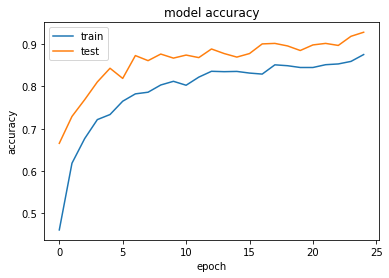

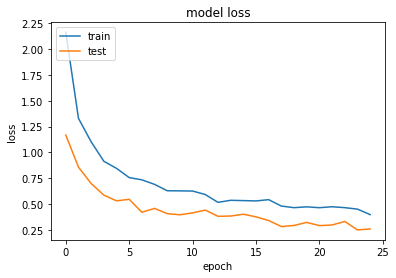

In [ ]:



from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=58, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()

batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)




print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# VGG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

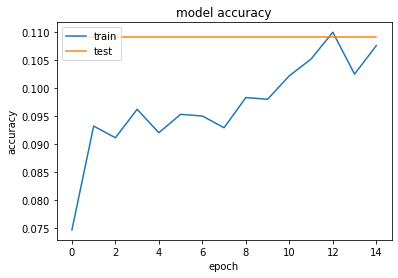

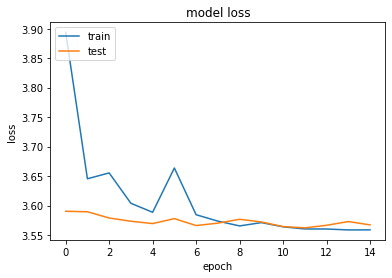

In [ ]:

vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=x_train.shape[1:],classes=58)

x = vgg16.output

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(128) (x)
x = tf.keras.layers.LeakyReLU(alpha=0.2) (x)
x = tf.keras.layers.GaussianDropout(0.4) (x)

output = Dense(units=num_classes,activation = 'softmax')(x)
model_vgg16 = Model(vgg16.input, output)
model_vgg16.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_vgg16.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'vgg16_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_vgg16.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
